## Observations and Insights 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "mouse_metadata.csv"
study_results_path = "mouse_study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
mouse_metadata["Mouse ID"].value_counts()
study_results["Mouse ID"].value_counts()

g989    13
a818    10
j989    10
s508    10
m550    10
        ..
f932     1
l872     1
u153     1
o848     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
mouse_duplicates

array(['g989'], dtype=object)

In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df_rem = pd.DataFrame.drop_duplicates(combined_df)
combined_df_rem.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice in the clean DataFrame.
combined_df_rem["Mouse ID"].value_counts()

g989    12
q633    10
y260    10
l733    10
a963    10
        ..
n482     1
d133     1
u153     1
f932     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_df_rem.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df_rem.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df_rem.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = combined_df_rem.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df_rem.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
summary_df
 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

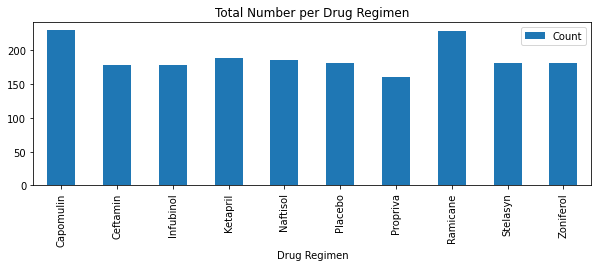

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
grouped_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
regimen_measurements_pan = grouped_df[["Drug Regimen", "Mouse ID"]]
regimen_measurements_pan = regimen_measurements_pan.rename(columns={"Mouse ID": "Count"})
regimen_measurements_pan = regimen_measurements_pan.set_index("Drug Regimen")
regimen_measurements_pan.plot(kind="bar", figsize=(10,3))
plt.title("Total Number per Drug Regimen")

plt.show()


([<matplotlib.axis.XTick at 0x24709ab92b0>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Propriva'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Zoniferol')])

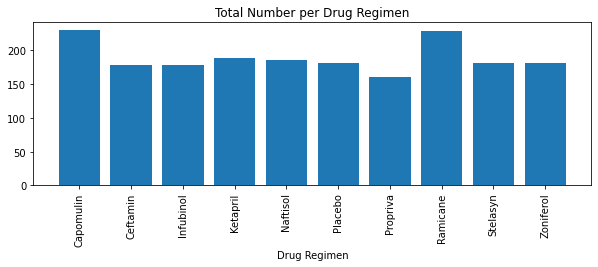

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

regimen_measurements_pyp = summary_df.index.tolist()
regimen_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
x_axis = regimen_measurements_pyp
x_axis = np.arange(len(regimen_count))
plt.figure(figsize=(10,3))
plt.bar(x_axis, regimen_count)
plt.title("Total Number per Drug Regimen")
plt.xlabel("Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_measurements_pyp, rotation=90)

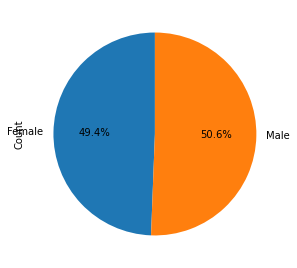

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex", "Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False)

([<matplotlib.patches.Wedge at 0x247086852b0>,
 [Text(-1.0997996703027118, 0.02099250347258563, 'Male'),
  Text(1.0997996703027118, -0.02099250347258625, 'Female')],
 [Text(-0.5998907292560246, 0.01145045643959216, '49.4%'),
  Text(0.5998907292560246, -0.011450456439592499, '50.6%')])

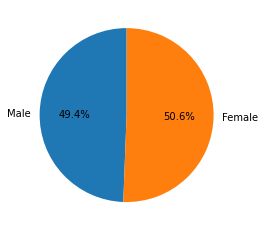

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()
labels = ["Male", "Female"]
plt.pie(gender_count, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol_df = combined_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_reg_merge_df = pd.merge(final_tumor_vol_df, combined_df, on=("Mouse ID", "Timepoint"),how="left")
drug_reg_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
244,q633,45,Zoniferol,Male,12,25,70.827796,2
245,s337,45,Zoniferol,Male,14,27,62.109651,4
246,w140,5,Zoniferol,Female,19,30,47.717952,0
247,w575,45,Zoniferol,Female,16,28,68.401286,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

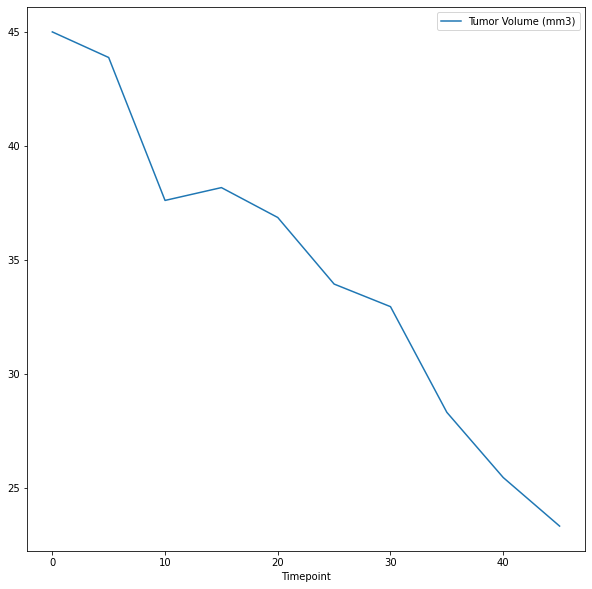

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_mouse = capomulin_mouse.reset_index(drop=True)
capomulin_mouse.set_index('Timepoint').plot(figsize=(10,10))

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_cap = pd.DataFrame(capomulin_mouse.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap = average_cap.set_index('Mouse ID')
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

KeyError: 'Mouse ID'

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
